<a id='statsmodels-regression'></a>
## Fitting a Linear Regression Using `statsmodels`

---

Now we will fit the linear regression model predicting the target from the titanic dataset, but this time using `statsmodels`.

The format looks like:

```python
import statsmodels.api as sm

X = df[["FACTOR1","FACTOR2"]].values
# manually add the intercept column:
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y = target

model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict()
```

First we load the statsmodels api module, which contains the ordinary least squares `OLS` model class. The statsmodels process is slightly different:
- We manually make a new column for the intercept in our design matrix $X$.
- The $y$ target variable comes before the $X$ predictor
- The data is provided during the instantiation of the model object, then fit is called without the data.

**Fit the model using statsmodels.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import os
#from dateutil.tz import tzutc
#from dateutil.parser import parse
from datetime import timezone, datetime
import pytz
plt.style.use('fivethirtyeight')
%matplotlib inline

pac = pytz.timezone('America/Los_Angeles')
utc = pytz.timezone('UTC')


In [7]:
fre = './Data/Bike_Counts/Fremont_Bridge.csv'
fremont = pd.read_csv(fre,parse_dates = [0],index_col='Date')

fremont.rename(columns = {'Fremont Bridge East Sidewalk' : 'EastSide',
                         'Fremont Bridge West Sidewalk':'WestSide',
                         'Date':'Date_Join'} , inplace= True)


fremont = fremont.tz_localize(pac,ambiguous = True, nonexistent = 'shift_forward')
fremont_d = fremont.resample('D').sum()
#fremont.head(10)

In [6]:
fremont_d = fremont.resample('D').sum()
fremont_d.head()

,EastSide,WestSide
Date,,
2012-10-03 00:00:00-07:00,1760.0,1761.0
2012-10-04 00:00:00-07:00,1708.0,1767.0
2012-10-05 00:00:00-07:00,1558.0,1590.0
2012-10-06 00:00:00-07:00,1080.0,926.0
2012-10-07 00:00:00-07:00,1191.0,951.0


In [104]:
bg ='./Data/Bike_Counts/BG_North.csv'
burke = pd.read_csv(bg,parse_dates = [0],index_col='Date')
burke.rename(columns = {'BGT North of NE 70th Total' : 'BG_All',
                         'Ped South':'Ped_South',
                         'Ped North':'Ped_North',
                         'Bike North':'Bike_North',
                         'Bike South': 'Bike_South'} , inplace= True)

burke = burke.tz_localize(pac,ambiguous = True, nonexistent = 'shift_forward')
burke.head(10)

,BG_All,Ped_South,Ped_North,Bike_North,Bike_South
Date,,,,,
2019-04-30 23:00:00-07:00,1.0,0.0,0.0,0.0,1.0
2019-04-30 22:00:00-07:00,8.0,0.0,2.0,2.0,4.0
2019-04-30 21:00:00-07:00,12.0,3.0,1.0,6.0,2.0
2019-04-30 20:00:00-07:00,50.0,8.0,11.0,7.0,24.0
2019-04-30 19:00:00-07:00,120.0,17.0,22.0,36.0,45.0
2019-04-30 18:00:00-07:00,185.0,22.0,22.0,43.0,98.0
2019-04-30 17:00:00-07:00,270.0,30.0,25.0,53.0,162.0
2019-04-30 16:00:00-07:00,189.0,19.0,21.0,47.0,102.0
2019-04-30 15:00:00-07:00,138.0,11.0,18.0,53.0,56.0


In [105]:
el ='./Data/Bike_Counts/Elliott_Bay.csv'
elliott = pd.read_csv(el,parse_dates = [0],index_col='Date')
elliott.rename(columns = {'Elliott Bay Trail in Myrtle Edwards Park Total' : 'EB_All',
                         'Ped South':'Ped_South',
                         'Ped North':'Ped_North',
                         'Bike North':'Bike_North',
                         'Bike South': 'Bike_South'} , inplace= True)

elliott = elliott.tz_localize(pac,ambiguous = True, nonexistent = 'shift_forward')
elliott.head(10)

,EB_All,Ped_North,Ped_South,Bike_North,Bike_South
Date,,,,,
2019-04-30 23:00:00-07:00,23.0,7.0,1.0,10.0,5.0
2019-04-30 22:00:00-07:00,23.0,2.0,3.0,16.0,2.0
2019-04-30 21:00:00-07:00,61.0,17.0,25.0,12.0,7.0
2019-04-30 20:00:00-07:00,201.0,68.0,95.0,25.0,13.0
2019-04-30 19:00:00-07:00,653.0,369.0,179.0,59.0,46.0
2019-04-30 18:00:00-07:00,1150.0,763.0,222.0,102.0,63.0
2019-04-30 17:00:00-07:00,1303.0,831.0,161.0,212.0,99.0
2019-04-30 16:00:00-07:00,1265.0,901.0,156.0,122.0,86.0
2019-04-30 15:00:00-07:00,1202.0,954.0,130.0,65.0,53.0


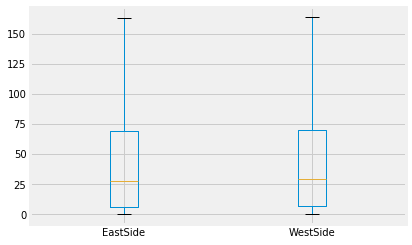

In [10]:
data= bridge[['EastSide','WestSide']]
data.plot(kind ='box',showfliers = False)

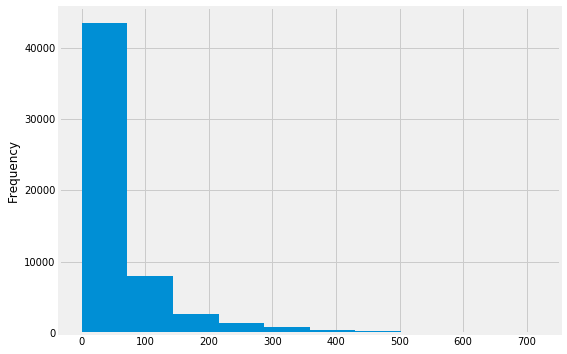

In [22]:
bridge['WestSide'].plot.hist(figsize=(8,6),bins = 10)

In [5]:
#mean squqred error
y = bridge['EastSide']
y_pred = y.mean()
mse = np.mean(np.square(y-y_pred))
np.sqrt(mse) #model was performing "this" far away from the prediction

67.36744877158993

In [14]:
bridge[bridge['Date_Join'] == '2015-11-14']

,Date_Join,EastSide,WestSide
30335,2015-11-14,2.0,4.0
